In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import h5py
# from matplotlib.patches import StepPatch

cut_lens = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
test_cut_lens = [7]
desired_shift = 3
max_shift = desired_shift * 2

In [2]:
metadata = np.load('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/all_test_metadata.npy', allow_pickle = True)

# Columns: 
# 0) sta_lat
# 1) sta_lons
# 2) source_lat
# 3) source_lon
# 4) source_depth_km
# 5) source_dist_km

In [3]:
metadata.shape

(337516, 6)

In [4]:
depth = metadata[:,4]
dist = metadata[:,5]

In [5]:
float_dist = dist.astype(float)
round_dist = np.around(float_dist)
print(dist)
print(round_dist)
round_dist_200 = np.round(float_dist / 200) * 200
print(round_dist_200)
round_dist_200_mlaa = round_dist_200[:324365]
round_dist_200_hist = round_dist_200[-13151:]

float_depth = depth.astype(float)
round_depth = np.around(float_depth)
print(depth)
print(round_depth)
round_depth_10 = np.round(float_depth / 10) * 10
round_depth_10_mlaa = round_depth_10[:324365]
round_depth_10_hist = round_depth_10[-13151:]
print(round_depth_10)

[51.61514859435106 57.98450098468874 60.640698388479244 ...
 '8222.601078296822' '8222.601078296822' '6727.379558984372']
[  52.   58.   61. ... 8223. 8223. 6727.]
[   0.    0.    0. ... 8200. 8200. 6800.]
[10.0 10.0 10.0 ... '598.1' '598.1' '598.1']
[ 10.  10.  10. ... 598. 598. 598.]
[ 10.  10.  10. ... 600. 600. 600.]


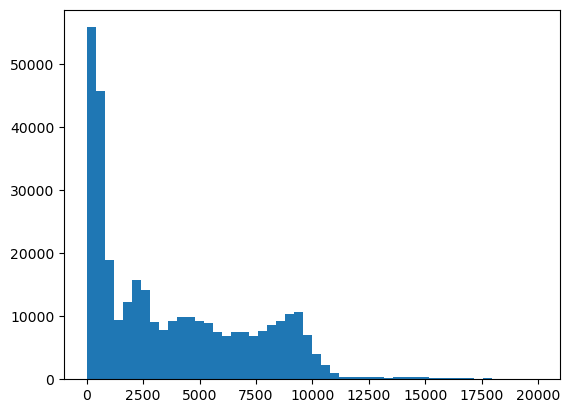

In [6]:
plt.hist(float_dist, bins = 50);

In [7]:
len(round_depth)

337516

In [8]:
max(round_depth)

675.0

In [9]:
### ----- Load the MLAAPDE testing dataset from HDF5 files ----- ###

hdf5_save_dir = '/hdd/mlaapde/decimated'

testing_data = h5py.File(hdf5_save_dir + '/testing_data.hdf5', 'r')
test_waves = testing_data['waves'][:]
test_mags = testing_data['magnitude'][:]
test_phase_id = testing_data['phase_id'][:]

testing_data.close()

In [10]:
test_waves_t = test_waves.transpose(0,2,1)

print(test_waves_t.shape)
print(test_mags.shape)

(324365, 2400, 3)
(324365,)


In [11]:
small_mag_is = []
med_mag_is = []
big_mag_is = []
very_small_mag_is = []

for i in range(len(test_mags)):
    mag = test_mags[i]
    if mag < 3:
        very_small_mag_is.append(i)
    elif mag >= 3 and mag < 4.5:
        small_mag_is.append(i)
    elif mag >= 4.5 and mag < 6.5:
        med_mag_is.append(i)
    else:
        big_mag_is.append(i)

In [12]:
big_mlaa_mags = test_mags[big_mag_is]
med_mags = test_mags[med_mag_is]
small_mags = test_mags[small_mag_is]

In [13]:
print(len(big_mlaa_mags))
print(len(med_mags))
print(len(small_mags))

print(len(big_mlaa_mags) + len(med_mags) + len(small_mags))

2191
136857
125907
264955


In [14]:
del test_waves

In [15]:
### ----- Load the historic testing dataset ----- ###

historic_path = '/hdd/mlaapde/decimated/'

historic_test_waves = np.load(historic_path + 'historic_test_waves.npy')
historic_test_mags = np.load(historic_path + 'historic_test_mags.npy')
print(historic_test_waves.shape)
n_channels_hist = 3

bad_hist_indices = np.loadtxt('/home/sdybing/mlaapde/codes/bad_historic_waves.txt').astype(int)

historic_test_waves_nonan = np.delete(historic_test_waves, bad_hist_indices, axis = 0)
historic_test_mags_nonan = np.delete(historic_test_mags, bad_hist_indices, axis = 0)

print(historic_test_waves.shape)
print(historic_test_waves_nonan.shape)
print(historic_test_mags.shape)
print(historic_test_mags_nonan.shape)

n_historic_test_samp = len(historic_test_waves_nonan)

(13449, 2400, 3)
(13449, 2400, 3)
(13151, 2400, 3)
(13449,)
(13151,)


In [16]:
min(historic_test_mags_nonan)

7.5

In [17]:
big_mags = np.append(np.array(big_mlaa_mags), historic_test_mags_nonan)

In [18]:
print(len(big_mags) + len(med_mags) + len(small_mags))

278106


In [19]:
both_test_mags = [test_mags*10-6, historic_test_mags_nonan*10-6]

In [20]:
both_test_mags

[array([20., 20., 20., ..., 25., 25., 25.]),
 array([70., 70., 70., ..., 77., 77., 77.], dtype=float32)]

In [21]:
bins = np.arange(0,19000,200)
bins

array([    0,   200,   400,   600,   800,  1000,  1200,  1400,  1600,
        1800,  2000,  2200,  2400,  2600,  2800,  3000,  3200,  3400,
        3600,  3800,  4000,  4200,  4400,  4600,  4800,  5000,  5200,
        5400,  5600,  5800,  6000,  6200,  6400,  6600,  6800,  7000,
        7200,  7400,  7600,  7800,  8000,  8200,  8400,  8600,  8800,
        9000,  9200,  9400,  9600,  9800, 10000, 10200, 10400, 10600,
       10800, 11000, 11200, 11400, 11600, 11800, 12000, 12200, 12400,
       12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200,
       14400, 14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000,
       16200, 16400, 16600, 16800, 17000, 17200, 17400, 17600, 17800,
       18000, 18200, 18400, 18600, 18800])

In [22]:
bins[41]

8200

In [23]:
round_dist_200

array([   0.,    0.,    0., ..., 8200., 8200., 6800.])

In [34]:
for cut_len in cut_lens:
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/errors/' + str(shift_len) + 's_window_errors.txt')
    # print(len(errors))
    
    # Distance boxplot ### ----- FIGURE 5 ----- ###
    
    bins = np.arange(0,20000,200)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    for abin in bins:
#         print(abin)
        i = np.where(round_dist_200 == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(errors[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('Magnitude estimation error by hypocentral distance (km): ' + str(shift_len) + '-second window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
    both_dist_200 = [round_dist_200_mlaa/200+0.5, round_dist_200_hist/200+0.5]
    ax2 = ax.twinx()
    ax2.set_yscale('log')
    ax2.hist(both_dist_200, bins = 95, color = ['#730114', '#f01f42'], stacked = True, alpha = 0.7)
    ax2.set_ylim(10**0, 10**19)
    ax2.set_yticks([1, 100, 10000])
    ax2.set_yticklabels(['1', '100', '10,000'])
#     ax2.set_ylim(0,150000)
#     ax2.set_yticks([0, 10000, 20000, 30000, 40000])
#     ax2.set_yticklabels(['0', '10,000', '20,000', '30,000', '40,000'], style = 'italic')
    ax2.text(s = 'Log count of waveforms\nin each distance bin', x = 102, y = 700000, fontsize = 18, color = 'black', rotation = 270)
    ax2.tick_params(labelsize = 18, color = 'black')
    ax2.set_zorder(2.9)
    mlaa_label = ax2.text(s = 'MLAAPDE test data distrib.', x = 68.35, y = 10**18, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
    hist_label = ax2.text(s = 'Historical test data distrib.', x = 68.7, y = 5*10**16, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
    mlaa_label.set_bbox(dict(facecolor = '#730114', alpha = 0.8, edgecolor = 'none'))
    hist_label.set_bbox(dict(facecolor = '#f01f42', alpha = 0.8, edgecolor = 'none'))
    
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 18, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 16, color = 'black')
    ax.set_ylabel('Magnitude error (estimated - catalog)', fontsize = 20, color = 'black')
    ax.set_xlabel('Hypocentral distance (km)', fontsize = 20, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/revised_figures/error_hypdist_boxplots/' + str(shift_len) + 's_window_error_hypdist_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();
    
    # Depth boxplot ### ----- FIGURE 4 ----- ###
    
    bins = np.arange(0,700,10)
#     print(len(bins))
    data_bins = []

    for abin in bins:
    #     print(abin)
        i = np.where(round_depth_10 == abin)[0]
    #     print(measured_mags[i])
        error_bin = np.array(errors[i])
    #     print(predict_bin)
        data_bins.append(error_bin)
    #     print('-----')

#     fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'white')
    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('Magnitude estimation error by source depth (km): ' + str(shift_len) + '-second window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
    both_depth_10 = [round_depth_10_mlaa/10+0.5, round_depth_10_hist/10+0.5]
    histcount_mlaa, histbins_mlaa  = np.histogram(round_depth_10_mlaa, bins = bins)
    histcount_hist, histbins_hist  = np.histogram(round_depth_10_hist, bins = bins)
    histcount_extramlaa, histbins_extramlaa = np.histogram(round_depth_10_mlaa, bins = bins)
    histcount_extrahist, histbins_extrahist = np.histogram(round_depth_10_hist, bins = bins)
    histcount_mlaa[1] = 0
    histcount_hist[1] = 0
    
    for idx in range(len(histcount_extramlaa)):
        if idx == 1:
            histcount_extramlaa[idx] = histcount_extramlaa[idx]
        else:
            histcount_extramlaa[idx] = 0
    for idx in range(len(histcount_extrahist)):
        if idx == 1:
            histcount_extrahist[idx] = histcount_extrahist[idx]
        else:
            histcount_extrahist[idx] = 0
            
    ax2 = ax.twinx()
#     ax2.hist(both_depth_10, bins = 70, color = ['#730114', '#f01f42'], stacked = True, zorder = 3.5)
    ax2.bar(x = histbins_hist[:-1]/10+1, height = histcount_hist+histcount_mlaa, align = 'center', width = 1, color = '#f01f42') # Adding height of other bar so that it's stacked properly
    ax2.bar(x = histbins_mlaa[:-1]/10+1, height = histcount_mlaa, align = 'center', width = 1, color = '#730114')
    ax2.bar(x = histbins_extrahist[:-1]/10+1, height = histcount_extrahist+histcount_extramlaa, align = 'center', width = 1, color = '#f01f42', alpha = 0.4)
    ax2.bar(x = histbins_extramlaa[:-1]/10+1, height = histcount_extramlaa, align = 'center', width = 1, color = '#730114', alpha = 0.2)
#     extra.set_zorder = 0
    ax2.set_ylim(0,170000)
#     ax2.set_ylim(10**1, 10**19.5)
#     ax2.set_yscale('log')
    ax2.set_yticks([0, 10000, 20000, 30000])
    ax2.set_yticklabels(['0', '10,000', '20,000', '30,000'])
    # ax2.set_ylabel('Count of waveforms in each magnitude bin', fontsize = 16, color = 'black', rotation = 270, labelpad = 18)
    ax2.text(s = 'Count of waveforms\nin each depth bin', x = 71.5, y = 42000, fontsize = 18, color = 'black', rotation = 270)
    ax2.tick_params(labelsize = 18, color = 'black')
    ax2.set_zorder(2.9)
    ax2.text(s = 'MLAAPDE test data distrib.', x = 47.8, y = 161000, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
    ax2.text(s = 'Historical test data distrib.', x = 48.1, y = 149500, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
    
# #     ax.set_facecolor('white')
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')

    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 18, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 16, color = 'black')
    ax.set_ylabel('Magnitude error (estimated - catalog)', fontsize = 20, color = 'black')
    ax.set_xlabel('Earthquake source depth (km)', fontsize = 20, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)
    
#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/revised_figures/error_depth_boxplots/' + str(shift_len) + 's_window_error_depth_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();


1
2
3
4
5
6
7
8
9
10
11
12
13
14
19
24
29
34
44
54
64
74
84
94
104
114


In [19]:
count, bins  = np.histogram(round_depth_10, bins = bins)

In [224]:
# count[1] = 0

In [225]:
len(count)

69

In [226]:
len(bins)

70

In [227]:
count

array([ 15580, 136248,  26841,  22356,  30343,  10697,   8665,   6578,
         6028,   5118,   5615,   6098,   5792,   4540,   3706,   3392,
         3197,   2230,   2100,   1597,   1366,   1524,   1053,    921,
          784,    545,    543,    257,    402,    311,    276,    576,
          206,    113,    186,    180,    346,    197,    549,    431,
          432,    745,    427,    386,    344,    681,    212,    321,
          506,    445,    768,    756,    984,   1256,   1251,   1420,
         1276,   1171,   1654,   1055,   1302,    790,    748,    556,
          416,     32,     34,      0,     61])

In [234]:
bins[:-1]

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680])

In [63]:
round_dist_200.shape

(337516,)

In [60]:
### Group the plots by magnitude

hist_bigmag_is = []

for i in range(len(round_dist_200)):
    if i >= 324365: # only get the last indices that are the historic ones
        hist_bigmag_is.append(i)

In [66]:
all_big_mag_is = big_mag_is + hist_bigmag_is
len(all_big_mag_is)

15342

In [67]:
for cut_len in cut_lens:
    
    group = all_big_mag_is # Don't forget to change figure name and saving location
    
    shift_len = cut_len - max_shift
    print(shift_len)
    errors = np.loadtxt('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/errors/' + str(shift_len) + 's_window_errors.txt')
    group_errors = errors[group]
    # print(len(errors))
    
    # Distance boxplot
    
    distances = round_dist_200[group]
    
    bins = np.arange(0,20000,200)
#     print(bins)
    data_bins = []
#     histogram_bins = []

    for abin in bins:
#         print(abin)
        i = np.where(distances == abin)[0]
#         print(round_dist[i])
        error_bin = np.array(group_errors[i])
    #     print(error_bin)
        data_bins.append(error_bin)
#         histogram_bins.append(np.array(round_dist_200[i])) # doesn't work
    #     print('-----')

    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('M6.5-9.1: Magnitude prediction error by hypocentral distance (km) - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
#     both_dist_200 = [round_dist_200_mlaa/200+0.5, round_dist_200_hist/200+0.5]
#     ax2 = ax.twinx()
#     ax2.set_yscale('log')
#     ax2.hist(both_dist_200, bins = 95, color = ['#730114', '#f01f42'], stacked = True, alpha = 0.7)
#     ax2.set_ylim(10**0, 10**19)
#     ax2.set_yticks([1, 100, 10000])
#     ax2.set_yticklabels(['1', '100', '10,000'], style = 'italic')
# #     ax2.set_ylim(0,150000)
# #     ax2.set_yticks([0, 10000, 20000, 30000, 40000])
# #     ax2.set_yticklabels(['0', '10,000', '20,000', '30,000', '40,000'], style = 'italic')
#     ax2.text(s = 'Log count of waveforms\nin each distance bin', x = 102, y = 700000, fontsize = 16, color = 'black', rotation = 270, style = 'italic')
#     ax2.tick_params(labelsize = 14, color = 'black')
#     ax2.set_zorder(2.9)
#     mlaa_label = ax2.text(s = 'MLAAPDE test data distrib.', x = 68.35, y = 10**18, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
#     hist_label = ax2.text(s = 'Historic test data distrib.', x = 70.65, y = 5*10**16, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
#     mlaa_label.set_bbox(dict(facecolor = '#730114', alpha = 0.8, edgecolor = 'none'))
#     hist_label.set_bbox(dict(facecolor = '#f01f42', alpha = 0.8, edgecolor = 'none'))
    
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')
    
    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 14, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 14, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 16, color = 'black')
    ax.set_xlabel('Hypocentral distance (km)', fontsize = 16, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)

#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_hypdist_boxplots/mag_separation/big_mags/' + str(shift_len) + 's_window_error_hypdist_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();
    
    # Depth boxplot
    
    depths = round_depth_10[group]
    
    bins = np.arange(0,700,10)
#     print(len(bins))
    data_bins = []

    for abin in bins:
    #     print(abin)
        i = np.where(depths == abin)[0]
    #     print(measured_mags[i])
        error_bin = np.array(group_errors[i])
    #     print(predict_bin)
        data_bins.append(error_bin)
    #     print('-----')

#     fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'white')
    fig = plt.figure(figsize = (14, 9), dpi = 300, facecolor = 'none')

    plt.rcParams['text.usetex'] = False

    fig.suptitle('M6.5-9.1: Magnitude prediction error by source depth (km) - ' + str(shift_len) + 's window', fontsize = 20, y = 0.93, color = 'black')
    ax = fig.add_subplot(111)
    
#     both_depth_10 = [round_depth_10_mlaa/10+0.5, round_depth_10_hist/10+0.5]
#     histcount_mlaa, histbins_mlaa  = np.histogram(round_depth_10_mlaa, bins = bins)
#     histcount_hist, histbins_hist  = np.histogram(round_depth_10_hist, bins = bins)
#     histcount_extramlaa, histbins_extramlaa = np.histogram(round_depth_10_mlaa, bins = bins)
#     histcount_extrahist, histbins_extrahist = np.histogram(round_depth_10_hist, bins = bins)
#     histcount_mlaa[1] = 0
#     histcount_hist[1] = 0
    
#     for idx in range(len(histcount_extramlaa)):
#         if idx == 1:
#             histcount_extramlaa[idx] = histcount_extramlaa[idx]
#         else:
#             histcount_extramlaa[idx] = 0
#     for idx in range(len(histcount_extrahist)):
#         if idx == 1:
#             histcount_extrahist[idx] = histcount_extrahist[idx]
#         else:
#             histcount_extrahist[idx] = 0
            
#     ax2 = ax.twinx()
# #     ax2.hist(both_depth_10, bins = 70, color = ['#730114', '#f01f42'], stacked = True, zorder = 3.5)
#     ax2.bar(x = histbins_hist[:-1]/10+1, height = histcount_hist+histcount_mlaa, align = 'center', width = 1, color = '#f01f42') # Adding height of other bar so that it's stacked properly
#     ax2.bar(x = histbins_mlaa[:-1]/10+1, height = histcount_mlaa, align = 'center', width = 1, color = '#730114')
#     ax2.bar(x = histbins_extrahist[:-1]/10+1, height = histcount_extrahist+histcount_extramlaa, align = 'center', width = 1, color = '#f01f42', alpha = 0.4)
#     ax2.bar(x = histbins_extramlaa[:-1]/10+1, height = histcount_extramlaa, align = 'center', width = 1, color = '#730114', alpha = 0.2)
# #     extra.set_zorder = 0
#     ax2.set_ylim(0,170000)
# #     ax2.set_ylim(10**1, 10**19.5)
# #     ax2.set_yscale('log')
#     ax2.set_yticks([0, 10000, 20000, 30000])
#     ax2.set_yticklabels(['0', '10,000', '20,000', '30,000'], style = 'italic')
#     # ax2.set_ylabel('Count of waveforms in each magnitude bin', fontsize = 16, color = 'black', rotation = 270, labelpad = 18)
#     ax2.text(s = 'Count of waveforms\nin each depth bin', x = 71.5, y = 42000, fontsize = 16, color = 'black', rotation = 270, style = 'italic')
#     ax2.tick_params(labelsize = 14, color = 'black')
#     ax2.set_zorder(2.9)
#     ax2.text(s = 'MLAAPDE test data distrib.', x = 47.8, y = 161000, fontsize = 18, backgroundcolor = '#730114', color = 'white', zorder = 25)
#     ax2.text(s = 'Historic test data distrib.', x = 49.5, y = 149500, fontsize = 18, backgroundcolor = '#f01f42', color = 'white', zorder = 25)
    
# #     ax.set_facecolor('white')
    ax.grid(which = 'major', axis = 'y', markevery = 0.5, zorder = 2)
    ax.grid(which = 'major', axis = 'x', zorder = 2.5)

    bp = ax.boxplot(data_bins, notch = False, patch_artist = True, zorder = 3)
    
    ax.set_facecolor('none')

    for patch in bp['boxes']:
        patch.set_facecolor('#99D9D9') 
        patch.set_edgecolor('#001528')
    for median in bp['medians']:
        median.set(color = '#001528', linewidth = 3)
    for whisker in bp['whiskers']:
        whisker.set(color = '#001528', linewidth = 1)
    for cap in bp['caps']:
        cap.set(color = '#001528', linewidth = 1)
    for flier in bp['fliers']:
        flier.set(marker = '+', color = '#001528', alpha = 0.5)

    bins_list = bins.tolist()
    ax.set_xticklabels(bins_list, fontsize = 14, color = 'black')
    ax.xaxis.set_major_locator(ticker.FixedLocator([1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]))
#     ax.xaxis.set_major_locator(ticker.FixedLocator([0, 10]))
    ax.axhline(0, color = 'gray', linestyle = '--', linewidth = 2, alpha = 0.8, zorder = 2)
    ax.tick_params(labelsize = 14, color = 'black')
    ax.set_ylabel('Magnitude error (predicted - catalog)', fontsize = 16, color = 'black')
    ax.set_xlabel('Earthquake source depth (km)', fontsize = 16, color = 'black')
    ax.set_ylim(-7,5)
    ax.set_zorder(3.1)
    ax.set_alpha(0)
    
#     plt.show();
    plt.savefig('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/figures/error_depth_boxplots/mag_separation/big_mags/' + str(shift_len) + 's_window_error_depth_boxplot.png', format = 'PNG', facecolor = 'white', transparent = False)
    plt.close();

1
2
3
4
5
6
7
8
9
10
11
12
13
14
19
24
29
34
44
54
64
74
84
94
104
114


In [71]:
### Saving the indices

np.save('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/small_mag_is.npy', np.array(small_mag_is))
np.save('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/med_mag_is.npy', np.array(med_mag_is))
np.save('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/all_big_mag_is.npy', np.array(all_big_mag_is))
np.save('/home/sdybing/mlaapde/testdata_preds/all_test_rerun/very_small_mag_is.npy', np.array(very_small_mag_is))